In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate training data

In [2]:
input_x = np.linspace(-1, 1, 100)
input_y = input_x*3 + np.random.randn(input_x.shape[0])*0.5

## Create computational graph

In [3]:
import simpleflow as sf

In [4]:
# Placeholders for training data
x = sf.Placeholder()
y_ = sf.Placeholder()

In [5]:
# Weigths
w = sf.Variable([[1.0]], name='weight')

# Threshold
b = sf.Variable(0.0, name='threshold')

In [6]:
# Predicted class by model
y = x*w + b

## Build loss

In [7]:
loss = sf.reduce_sum(sf.square(y - y_))

## Optimizer

In [8]:
train_op = sf.GradientDescentOptimizer(learning_rate=0.005).minimize(loss)

## Training

In [9]:
feed_dict = {x: np.reshape(input_x, (-1, 1)), y_: np.reshape(input_y, (-1, 1))}
feed_dict = {x: input_x, y_: input_y}
with sf.Session() as sess:
    for step in range(20):
        loss_value = sess.run(loss, feed_dict=feed_dict)
        mse = loss_value/len(input_x)
        
        if step % 1 == 0:
            print('step: {}, loss: {}, mse: {}'.format(step, loss_value, mse))
        sess.run(train_op, feed_dict)
    w_value = sess.run(w, feed_dict=feed_dict)
    b_value = sess.run(b, feed_dict=feed_dict)
    print('w: {}, b: {}'.format(w_value, b_value))

step: 0, loss: 147.31229301332186, mse: 1.4731229301332187
step: 1, loss: 75.2862864776536, mse: 0.7528628647765361
step: 2, loss: 44.009064387253, mse: 0.44009064387253
step: 3, loss: 30.387486500361295, mse: 0.30387486500361294
step: 4, loss: 24.455137917985002, mse: 0.24455137917985004
step: 5, loss: 21.871534168474543, mse: 0.21871534168474543
step: 6, loss: 20.746346017138585, mse: 0.20746346017138584
step: 7, loss: 20.256314070038826, mse: 0.20256314070038825
step: 8, loss: 20.042899710055327, mse: 0.20042899710055326
step: 9, loss: 19.949955384044085, mse: 0.19949955384044085
step: 10, loss: 19.90947709692998, mse: 0.19909477096929978
step: 11, loss: 19.891848352949488, mse: 0.19891848352949487
step: 12, loss: 19.884170838991114, mse: 0.19884170838991114
step: 13, loss: 19.880827196321707, mse: 0.19880827196321707
step: 14, loss: 19.879371002772437, mse: 0.19879371002772436
step: 15, loss: 19.8787368142952, mse: 0.19878736814295198
step: 16, loss: 19.878460618163945, mse: 0.1987

## Plot regression line

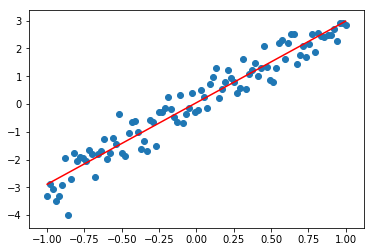

In [10]:
w_value = float(w_value)
max_x, min_x = np.max(input_x), np.min(input_x)
max_y, min_y = w_value*max_x + b_value, w_value*min_x + b_value

plt.plot([max_x, min_x], [max_y, min_y], color='r')
plt.scatter(input_x, input_y)
plt.show()